<a href="https://colab.research.google.com/github/ReasonDuan/machine-learning-code/blob/main/network_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 前置函数


In [41]:
import numpy as np


# 激活函数
def sigmoid(x):
 return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

# 最大值
def softmax(a):
 exp_a = np.exp(a)
 sum_exp_a = np.sum(exp_a)
 y = exp_a / sum_exp_a
 return y


# 函数f在x处的梯度计算
def numerical_gradient(f, x):
 h = 1e-4 # 0.0001
 grad = np.zeros_like(x) # 生成和x形状相同的数组
 for idx in range(x.size):
  tmp_val = x[idx]
  # f(x+h)的计算
  x[idx] = tmp_val + h
  fxh1 = f(x)
  # f(x-h)的计算
  x[idx] = tmp_val - h
  fxh2 = f(x)
  grad[idx] = (fxh1 - fxh2) / (2*h)
  x[idx] = tmp_val # 还原值
 return grad

# 交叉熵，监督数据为one-hot模式
def cross_entropy_error(y, t):
 if y.ndim == 1:
  t = t.reshape(1, t.size)
  y = y.reshape(1, y.size)
 batch_size = y.shape[0]
 return -np.sum(t * np.log(y + 1e-7)) / batch_size


# 交叉熵, 监督数据为指定值 2，8
def cross_entropy_error_02(y, t):
 if y.ndim == 1:
  t = t.reshape(1, t.size)
  y = y.reshape(1, y.size)
 batch_size = y.shape[0]
 return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


def change_one_hot_label(X):
  T = np.zeros((X.size, 10))
  for idx, row in enumerate(T):
      row[X[idx]] = 1

  return T


## 创建神经网络类

创建一个2层神经网络的类

In [39]:

import sys, os
sys.path.append(os.pardir)

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  # 预测
  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)
    return y

  # 损失率， x: 输入数据, t: 监督数据
  def loss(self, x, t):
    y = self.predict(x)
    return cross_entropy_error(y, t)

  # 准确率
  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy

  # 权重参数相对损失函数的梯度计算
  def numerical_gradient_full(self, x, t):
    loss_W = lambda W: self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

  def gradient(self, x, t):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']
    grads = {}

    batch_num = x.shape[0]

    # forward
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    # backward
    dy = (y - t) / batch_num
    grads['W2'] = np.dot(z1.T, dy)
    grads['b2'] = np.sum(dy, axis=0)

    da1 = np.dot(dy, W2.T)
    dz1 = sigmoid_grad(a1) * da1
    grads['W1'] = np.dot(x.T, dz1)
    grads['b1'] = np.sum(dz1, axis=0)

    return grads

## 拉取数据
获取训练数据，并进行初始化
**加粗文字**

In [37]:
!pip install -q tensorflow
import tensorflow as tf

# 加载 MNIST 数据集
mnist = tf.keras.datasets.mnist
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
t_train = change_one_hot_label(t_train)
t_test = change_one_hot_label(t_test)


# (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_laobel = True)
train_loss_list = []
train_acc_list = []
test_acc_list = []

# 超参数
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

# 平均每个epoch的重复次数
iter_per_epoch = max(train_size / batch_size, 1)


## 开始训练

train acc, test acc | 0.1243, 0.1284
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135


<ipython-input-41-a8bce8d1d44b>:13: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
<ipython-input-41-a8bce8d1d44b>:15: RuntimeWarning: invalid value encountered in divide
  y = exp_a / sum_exp_a


train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.09871666666666666, 0.098


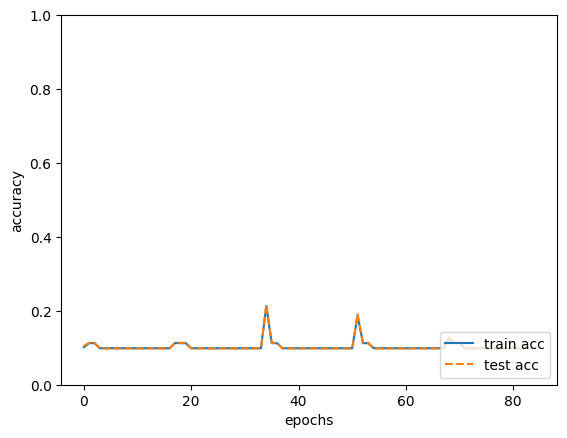

In [46]:
!pip install matplotlib

import matplotlib.pyplot as plt

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  grad = network.gradient(x_batch, t_batch)

  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)
  # 计算每个epoch的识别精度
  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

%matplotlib inline

# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

Relu 层

In [2]:
import numpy as np

class Relu:
  def __init__(self):
    self.mask = None

  def forward(self, x):
    self.mask = (x <= 0)
    out = x.copy()
    out[self.mask] = 0
    return out

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout
    return dx

relu = Relu()
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(relu.forward(x))
mask = (x <= 0)
print(mask)
print(relu.backward(x))

[[1. 0.]
 [0. 3.]]
[[False  True]
 [ True False]]


Sigmoid 层

In [1]:
import numpy as np
class Sigmoid:
  def __init__(self):
    self.out = None

  def forward(self, x):
    out = 1 / (1 + np.exp(-x))
    self.out = out
    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out
    return dx

sigmoid = Sigmoid()
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(sigmoid.forward(x))

[[0.73105858 0.37754067]
 [0.11920292 0.95257413]]


Affine 层

In [ ]:
class Affine:
  def __init__(self, W, b):
    self.W = W
    self.b = b
    self.x = None
    self.dW = None
    self.db = None

  def forward(self, x):
    self.x = x
    out = np.dot(x, self.W) + self.b
    return out

  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis=0)
    return dx

Softmax-with-Loss 层

In [ ]:
class SoftmaxWithLoss:
  def __init__(self):
    self.loss = None
    self.y = None
    self.t = None

  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)
    return self.loss

  def backward(self, dout=1):
    batch_size = self.t.shape[0]
    dx = (self.y - self.t) / batch_size
    return dx

In [8]:
# 打印python版本号
import sys
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


加载数据

In [11]:
# coding: utf-8
import requests
import os.path
import gzip
import pickle
import os
import numpy as np

# https://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
url_base = 'https://ossci-datasets.s3.amazonaws.com/mnist/'  # mirror site
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = './data'
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):

  # 确保目录存在
  os.makedirs(dataset_dir, exist_ok=True)

  save_path = os.path.join(dataset_dir, file_name)

  # 判断文件是否存在
  if os.path.exists(save_path):
    return
  # 下载文件
  response = requests.get(url_base + file_name, stream=True)

  # 将内容保存到指定目录下
  with open(save_path, 'wb') as file:
    for chunk in response.iter_content(chunk_size=1024):
      if chunk:
        file.write(chunk)

  print(f"文件已下载并保存到: {save_path}")


def download_mnist():
  for v in key_file.values():
    _download(v)

def _load_label(file_name):
  file_path = dataset_dir + "/" + file_name

  print("Converting " + file_name + " to NumPy Array ...")
  with gzip.open(file_path, 'rb') as f:
    labels = np.frombuffer(f.read(), np.uint8, offset=8)
  print("Done")

  return labels

def _load_img(file_name):
  file_path = dataset_dir + "/" + file_name

  print("Converting " + file_name + " to NumPy Array ...")
  with gzip.open(file_path, 'rb') as f:
    data = np.frombuffer(f.read(), np.uint8, offset=16)
  data = data.reshape(-1, img_size)
  print("Done")

  return data

def _convert_numpy():
  dataset = {}
  dataset['train_img'] =  _load_img(key_file['train_img'])
  dataset['train_label'] = _load_label(key_file['train_label'])
  dataset['test_img'] = _load_img(key_file['test_img'])
  dataset['test_label'] = _load_label(key_file['test_label'])

  return dataset

def init_mnist():
  download_mnist()
  dataset = _convert_numpy()
  print("Creating pickle file ...")
  with open(save_file, 'wb') as f:
    pickle.dump(dataset, f, -1)
  print("Done!")

def _change_one_hot_label(X):
  T = np.zeros((X.size, 10))
  for idx, row in enumerate(T):
      row[X[idx]] = 1

  return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
  """读入MNIST数据集

  Parameters
  ----------
  normalize : 将图像的像素值正规化为0.0~1.0
  one_hot_label :
    one_hot_label为True的情况下，标签作为one-hot数组返回
    one-hot数组是指[0,0,1,0,0,0,0,0,0,0]这样的数组
  flatten : 是否将图像展开为一维数组

  Returns
  -------
  (训练图像, 训练标签), (测试图像, 测试标签)
  """
  if not os.path.exists(save_file):
    init_mnist()

  with open(save_file, 'rb') as f:
    dataset = pickle.load(f)

  if normalize:
    for key in ('train_img', 'test_img'):
      dataset[key] = dataset[key].astype(np.float32)
      dataset[key] /= 255.0

  if one_hot_label:
    dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
    dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

  if not flatten:
    for key in ('train_img', 'test_img'):
      dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

  return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])


if __name__ == '__main__':
  init_mnist()


文件已下载并保存到: ./data/train-images-idx3-ubyte.gz
文件已下载并保存到: ./data/train-labels-idx1-ubyte.gz
文件已下载并保存到: ./data/t10k-images-idx3-ubyte.gz
文件已下载并保存到: ./data/t10k-labels-idx1-ubyte.gz
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


常用方法

In [14]:
# coding: utf-8
import numpy as np


def identity_function(x):
  return x


def step_function(x):
  return np.array(x > 0, dtype=np.int)


def sigmoid(x):
  return 1 / (1 + np.exp(-x))


def sigmoid_grad(x):
  return (1.0 - sigmoid(x)) * sigmoid(x)


def relu(x):
  return np.maximum(0, x)


def relu_grad(x):
  grad = np.zeros(x)
  grad[x>=0] = 1
  return grad


def softmax(x):
  if x.ndim == 2:
    x = x.T
    x = x - np.max(x, axis=0)
    y = np.exp(x) / np.sum(np.exp(x), axis=0)
    return y.T

  x = x - np.max(x) # 溢出对策
  return np.exp(x) / np.sum(np.exp(x))


def mean_squared_error(y, t):
  return 0.5 * np.sum((y-t)**2)


def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  # 监督数据是one-hot-vector的情况下，转换为正确解标签的索引
  if t.size == y.size:
    t = t.argmax(axis=1)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


def softmax_loss(X, t):
  y = softmax(X)
  return cross_entropy_error(y, t)


工具

In [15]:
# coding: utf-8
import numpy as np


def smooth_curve(x):
    """用于使损失函数的图形变圆滑

    参考：http://glowingpython.blogspot.jp/2012/02/convolution-with-numpy.html
    """
    window_len = 11
    s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
    w = np.kaiser(window_len, 2)
    y = np.convolve(w/w.sum(), s, mode='valid')
    return y[5:len(y)-5]


def shuffle_dataset(x, t):
    """打乱数据集

    Parameters
    ----------
    x : 训练数据
    t : 监督数据

    Returns
    -------
    x, t : 打乱的训练数据和监督数据
    """
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

def conv_output_size(input_size, filter_size, stride=1, pad=0):
    return (input_size + 2*pad - filter_size) / stride + 1


def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """

    Parameters
    ----------
    input_data : 由(数据量, 通道, 高, 长)的4维数组构成的输入数据
    filter_h : 滤波器的高
    filter_w : 滤波器的长
    stride : 步幅
    pad : 填充

    Returns
    -------
    col : 2维数组
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col


def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    """

    Parameters
    ----------
    col :
    input_shape : 输入数据的形状（例：(10, 1, 28, 28)）
    filter_h :
    filter_w
    stride
    pad

    Returns
    -------

    """
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

网络层

In [16]:
# coding: utf-8
import numpy as np


class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx


class Affine:
    def __init__(self, W, b):
        self.W =W
        self.b = b

        self.x = None
        self.original_x_shape = None
        # 权重和偏置参数的导数
        self.dW = None
        self.db = None

    def forward(self, x):
        # 对应张量
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)

        dx = dx.reshape(*self.original_x_shape)  # 还原输入数据的形状（对应张量）
        return dx


class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None # softmax的输出
        self.t = None # 监督数据

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)

        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 监督数据是one-hot-vector的情况
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size

        return dx


class Dropout:
    """
    http://arxiv.org/abs/1207.0580
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask


class BatchNormalization:
    """
    http://arxiv.org/abs/1502.03167
    """
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None # Conv层的情况下为4维，全连接层的情况下为2维

        # 测试时使用的平均值和方差
        self.running_mean = running_mean
        self.running_var = running_var

        # backward时使用的中间数据
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)

        return out.reshape(*self.input_shape)

    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)

        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std

            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))

        out = self.gamma * xn + self.beta
        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size

        self.dgamma = dgamma
        self.dbeta = dbeta

        return dx


class Convolution:
  def __init__(self, W, b, stride=1, pad=0):
    self.W = W
    self.b = b
    self.stride = stride
    self.pad = pad

    # 中间数据（backward时使用）
    self.x = None
    self.col = None
    self.col_W = None

    # 权重和偏置参数的梯度
    self.dW = None
    self.db = None

  def forward(self, x):
    FN, C, FH, FW = self.W.shape
    N, C, H, W = x.shape
    out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
    out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

    col = im2col(x, FH, FW, self.stride, self.pad)
    col_W = self.W.reshape(FN, -1).T

    out = np.dot(col, col_W) + self.b
    out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

    self.x = x
    self.col = col
    self.col_W = col_W

    return out

  def backward(self, dout):
    FN, C, FH, FW = self.W.shape
    dout = dout.transpose(0,2,3,1).reshape(-1, FN)

    self.db = np.sum(dout, axis=0)
    self.dW = np.dot(self.col.T, dout)
    self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

    dcol = np.dot(dout, self.col_W.T)
    dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

    return dx


class Pooling:
  def __init__(self, pool_h, pool_w, stride=1, pad=0):
    self.pool_h = pool_h
    self.pool_w = pool_w
    self.stride = stride
    self.pad = pad

    self.x = None
    self.arg_max = None

  def forward(self, x):
    N, C, H, W = x.shape
    out_h = int(1 + (H - self.pool_h) / self.stride)
    out_w = int(1 + (W - self.pool_w) / self.stride)

    col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
    col = col.reshape(-1, self.pool_h*self.pool_w)

    arg_max = np.argmax(col, axis=1)
    out = np.max(col, axis=1)
    out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

    self.x = x
    self.arg_max = arg_max

    return out

  def backward(self, dout):
    dout = dout.transpose(0, 2, 3, 1)

    pool_size = self.pool_h * self.pool_w
    dmax = np.zeros((dout.size, pool_size))
    dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
    dmax = dmax.reshape(dout.shape + (pool_size,))

    dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
    dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)

    return dx


梯度函数

In [17]:
# coding: utf-8
import numpy as np

def _numerical_gradient_1d(f, x):
  h = 1e-4 # 0.0001
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]
    x[idx] = float(tmp_val) + h
    fxh1 = f(x) # f(x+h)

    x[idx] = tmp_val - h
    fxh2 = f(x) # f(x-h)
    grad[idx] = (fxh1 - fxh2) / (2*h)

    x[idx] = tmp_val # 还原值

  return grad


def numerical_gradient_2d(f, X):
  if X.ndim == 1:
    return _numerical_gradient_1d(f, X)
  else:
    grad = np.zeros_like(X)

    for idx, x in enumerate(X):
        grad[idx] = _numerical_gradient_1d(f, x)

    return grad


def numerical_gradient(f, x):
  h = 1e-4 # 0.0001
  grad = np.zeros_like(x)

  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:
    idx = it.multi_index
    tmp_val = x[idx]
    x[idx] = float(tmp_val) + h
    fxh1 = f(x) # f(x+h)

    x[idx] = tmp_val - h
    fxh2 = f(x) # f(x-h)
    grad[idx] = (fxh1 - fxh2) / (2*h)

    x[idx] = tmp_val # 还原值
    it.iternext()

  return grad

TwoLayerNet 类

In [18]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from collections import OrderedDict

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    # 初始化权重
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

    # 生成层
    self.layers = OrderedDict()
    self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
    self.layers['Relu1'] = Relu()
    self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

    self.lastLayer = SoftmaxWithLoss()

  def predict(self, x):
    for layer in self.layers.values():
      x = layer.forward(x)

    return x

  # x:输入数据, t:监督数据
  def loss(self, x, t):
    y = self.predict(x)
    return self.lastLayer.forward(y, t)

  # 精准度
  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    if t.ndim != 1 : t = np.argmax(t, axis=1)
    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy
  # x:输入数据, t:监督数据
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)
    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
    return grads

  # 通过反向传播计算梯度
  def gradient(self, x, t):
    # forward
    self.loss(x, t)
    # backward
    dout = 1
    dout = self.lastLayer.backward(dout)
    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout = layer.backward(dout)
    # 设定
    grads = {}
    grads['W1'] = self.layers['Affine1'].dW
    grads['b1'] = self.layers['Affine1'].db
    grads['W2'] = self.layers['Affine2'].dW
    grads['b2'] = self.layers['Affine2'].db
    return grads




训练

In [21]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)

import numpy as np

# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.13

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 梯度
  #grad = network.numerical_gradient(x_batch, t_batch)
  grad = network.gradient(x_batch, t_batch)

  # 更新
  for key in ('W1', 'b1', 'W2', 'b2'):
      network.params[key] -= learning_rate * grad[key]

  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print(train_acc, test_acc)



0.10038333333333334 0.1012
0.9070166666666667 0.9102
0.9275833333333333 0.9264
0.9448166666666666 0.9417
0.9524833333333333 0.9489
0.9553166666666667 0.951
0.96395 0.9561
0.9648666666666667 0.9588
0.9703333333333334 0.961
0.9731666666666666 0.965
0.97305 0.9642
0.9767833333333333 0.9674
0.9768833333333333 0.9679
0.9796333333333334 0.9698
0.98045 0.9688
0.9818833333333333 0.9715
0.9815666666666667 0.9699


In [22]:
for key in ('W1', 'b1', 'W2', 'b2'):
  print(network.params[key].shape)

(784, 50)
(50,)
(50, 10)
(10,)
